<b> Author: Sami Mwanje, mm223kk@student.lnu.se </b>

Sets from:

https://www.kaggle.com/datasets/saurabh00007/diabetescsv

https://www.kaggle.com/datasets/merishnasuwal/breast-cancer-prediction-dataset  ...Cancer.csv

https://www.kaggle.com/datasets/merishnasuwal/breast-cancer-prediction-dataset

In [1]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances

The numpy library is used to handle matrixes.

sklearn.cluster is used for the KMeans.

Normalizing function

In [2]:
# Normalizing functionm, since it is always recommended to normalize data before use.
def normalizeXData(dataX):
    meanValue = dataX.mean(axis=0)                                                  #   Compute mean µi.
    stadardDev = dataX.std(axis=0)                                                  #   Compute standard deviation σi.  
    return (dataX - meanValue)/stadardDev                                           # Compute normalized Xn in as Xn = (X − µ)/σ.   
division = 0.002                                          

Normalizing features removes different effects from different units.

Without nomralization some features can "starve" each other.

Yx is normalized version of wine set with only two columns.

Compute the stress E of Y . See slide 46 of Lecture 12 for the formula.

In [3]:
def sammonStress(distY, distX):
    distanceSumX = np.sum(distX)/2          # Divide the Sum of features distances  with two.
    n = ( (distY - distX) ** 2 )            # Compute numerator.
    d = distX.copy()                        # Compute denominator.
    d[d < division] = division                      # Using 1e-5 as zeros since can't divide by zero.
    dist = np.sum(n/d)/2                    # Set distance to sum of (numerator/[d,...1e-5])/2.
    return  dist/distanceSumX               # Return new distances.

Summon stress function. Return a summon computed distance of E of Y.

Gradient descent

In [4]:
def gradientDescent(Y,X,alpha):
    for i in range(Y.shape[0]):
        
        Yi = np.reshape(Y[i], (1,2))   # Curent output space row.
        Yj = np.delete(Y.copy(), i, axis= 0)  # Delete all rows from the i-element.
        Xi = np.reshape(X[i], (1,X.shape[1])) # Curent input space row.
        Xj = np.delete(X.copy(), i, axis= 0)  # Delete all rows from the i-element.
        
        distanceOut = np.reshape(euclidean_distances(Yi, Yj), (Yj.shape[0], 1)) # Get distance between Yi and Yj.
        distanceIn =  np.reshape(euclidean_distances(Xi, Xj), (Yj.shape[0], 1)) # Get distance between Xi and Xj.
        
        numerator = distanceIn - distanceOut    # Set numerator to distance input space subtracted by distance input space.
        denominator = distanceOut * distanceIn  # Set numerator to distance output multiplied by distance input  space.
        denominator[denominator < division] = division  # Using value close to zero since can't divede by zero.
      
        p = np.sum(euclidean_distances(Xi,Xj[:int(Xj.shape[0]/2)])) # Sum of distances between Xi and Xj half of Xj's features.
        Yisub = Yi - Yj                                             # Array of current diffrence between Yi and Yj.
        firstDerivitive = (-2 /p ) * np.sum((numerator / denominator) * Yisub, axis = 0)  # Get the first derivitive.
        secondderivitive = (-2 / p) * np.sum(1/denominator * (Yisub - ((Yisub ** 2)/distanceOut) * (1 + (Yisub/ distanceOut) ) ), axis= 0) # Get the second derivitive.
        Y[i] = Y[i] - alpha * (firstDerivitive / abs(secondderivitive))
    return Y

Function used to run gradient descent and return Y.

In [5]:
def sammon(X, max_iter,errors, alpha):
    Y = np.random.rand(X.shape[0],2)                        # Start with a random outpute space.
    distX = euclidean_distances(X, X)                       # Get the distance input space for X.
    for i in range(max_iter):
        distY = euclidean_distances(Y, Y)                   # Compute distance output space for Y.
        Y = gradientDescent(Y,X, alpha)                     # Compute gradient descent on data.
        sammonStressError = sammonStress(distY, distX)
        #print(sammonStressError)
        if sammonStressError < errors:                      # Run summon stress and, check if the sommon Stress ruturn is less than the threshold.
            break                                           # Break if error surpas threshold.
    return Y                                                # Return the gradient result.

<b>Exercise 4.3.1 Comparison of DR Techniques </b>

In [6]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [7]:
data1 = np.loadtxt('breast_cancer_data.csv', delimiter=',', skiprows=1)
data2 = np.loadtxt('diabetes.csv', delimiter=',',skiprows=1)
data3 = np.loadtxt('cancer.csv', delimiter=',', skiprows=1)

# Normalize and save as 
sets = []
set1 =  normalizeXData(data1[:500,:])  # Breast cancer
set2 = normalizeXData(data2[:500,:])   # Diabetes
set3 = normalizeXData(np.c_[data3[:,1:], data3[:,0:1]]) # Redoder  Cancer.csv


setnames = ['Breast Cancer', 'Diabets', 'Cancer'] # The names of the sets.

# Name of the labels for each set.
names = []
names.append(['MeanRadius','MeanTexture','MeanPerimeter','Mean_area','MeanSmoothness','Diagnosis'])
names.append(['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'])
names.append(['age','menopause','tumor-size','inv-nodes','node-caps','deg-malig','breast','breast-quad','irradiat'])

print(names[0])
sets.append(set1) # Append to array.
sets.append(set2) # Append to array.
sets.append(set3) # Append to array.

['MeanRadius', 'MeanTexture', 'MeanPerimeter', 'Mean_area', 'MeanSmoothness', 'Diagnosis']


Preparing the three data sets breast_cancer_data.csv, diabetes.csv and heart_failure_clinical_records_dataset.csv
for load.

The data is also appended to the array "sets" so it easily can be handled by a for-loop.

set1 =  Breast cancer

set2 =  Diabetes 

set3 =  Heart failure 

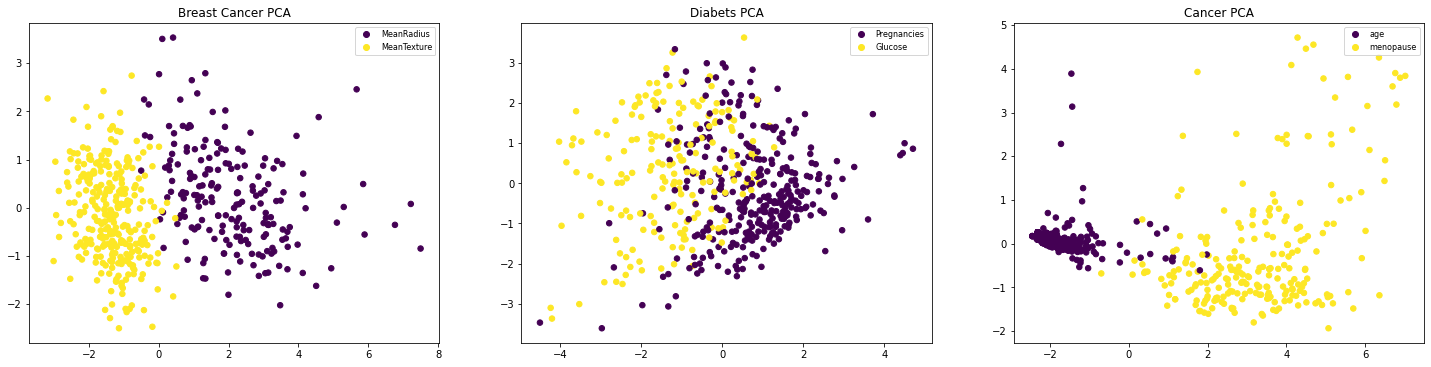

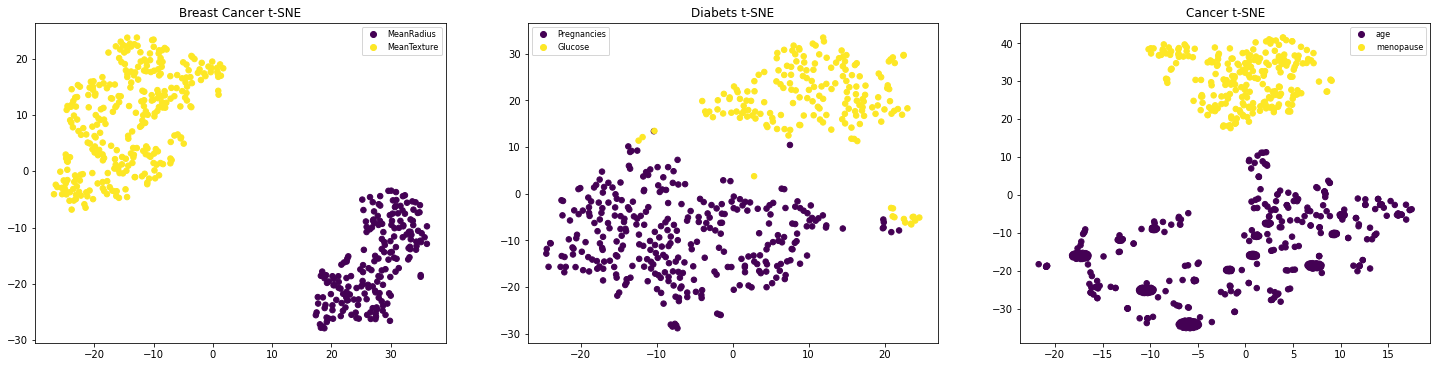

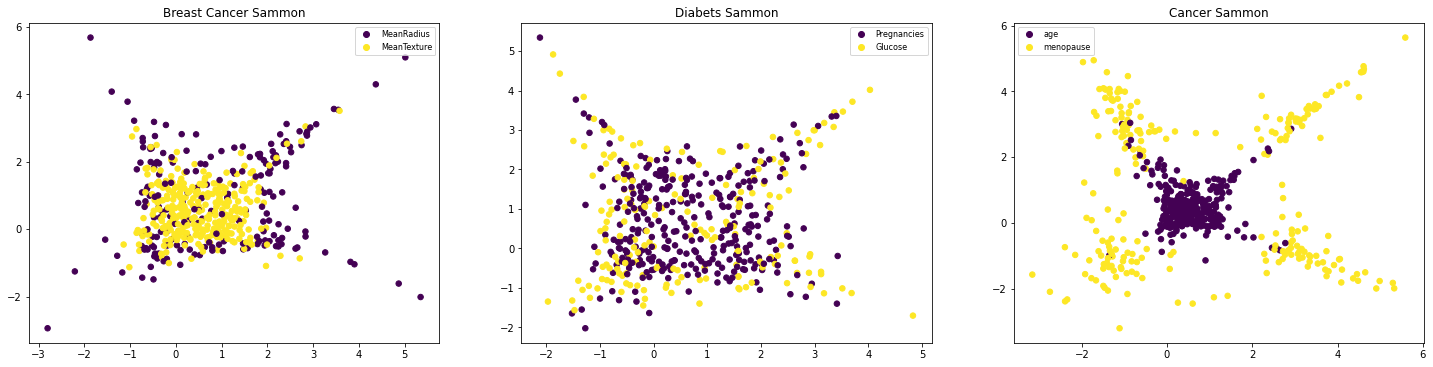

In [8]:
# Plot using PCA.
size = 30  # Size of points.
plt.figure(figsize=(25, 20))
for i in range(1,4):
    plt.subplot(3,3, i)
    plt.title( str(setnames[i-1])  +' PCA')                                                       # Set title PCA.
    pcaY = PCA(n_components=2).fit_transform(sets[i-1])                                           # Fit data to PCA.
    scatter = plt.scatter(pcaY[:,0], pcaY[:,1],s = size, c=sets[i-1][:,-1])                       # Scatter, and us target value to decied color points.
    plt.legend(handles=scatter.legend_elements()[0], prop={'size': 8}, labels=names[i-1])
  
# Plot using t-SNE.
plt.figure(figsize=(25, 20))
for i in range(1,4):
    plt.subplot(3,3, i)
    plt.title(str(setnames[i-1])  +' t-SNE')                                                    # Set title t-SNE.
    tsneY = TSNE(n_components=2).fit_transform(sets[i-1])                                       # Fit data to t-SNE.
    scatter = plt.scatter(tsneY[:,0], tsneY[:,1],s = size, c=sets[i-1][:,-1])                   # Scatter, and us target value to decied color points.
    plt.legend(handles=scatter.legend_elements()[0], prop={'size': 8}, labels=names[i-1])


# Plot using Sammon implementation.
plt.figure(figsize=(25, 20))
for i in range(1,4):
    plt.subplot(3,3, i)
    plt.title( str(setnames[i-1])  +' Sammon')                                                  # Set title Sammon.
    tsneY = sammon(sets[i-1],100,0.3,0.03)                                          # Fit data using sammon implementation error 0 and alpha 0.3.
    scatter = plt.scatter(tsneY[:,0], tsneY[:,1],s = size, c=sets[i-1][:,-1])                   # Scatter, and us target value to decied color points.
    plt.legend(handles=scatter.legend_elements()[0], prop={'size': 8}, labels=names[i-1])
plt.show()

The used data sets where Breast Cancer, Diabets and Cancer.

All three DR techniques t-SNE, PCA and Sammon reduces the dimensions to the same degree. For me t-SNE is still the most readable.

When comparing the plots of the three different DR methods PCA, t-SNE and Sammon, we can see that t-SNE gives us a result where
we can more clearly seperate the classes compared to the others. 

PCA also gives a clear pretty clear and understandable result where we can see the seperation of the classes. Though the classes are not fully separable as in the t-SNE method. 

The Sammon result for the "Cancer" data set is a bit unclear, it can be done more or less clear by tuning with the hyperparameters. I went for static parameters 100,0.3,0.03, which worked best for all three Sammon plots. I had to adjust the learning rate a litle bit before I could get a working Sammon function for this particular data sets. 

The unclearness here may also be due to a that sammon mapping result is not the same as the normaly used linear reduction methods such as PCA and t-SNE. The goal is to construct a new lower-dimension dataset with a similar structure to the original one,  rater than projecting then the original data and highlight the most important features.

This result tells us that t-SNE is a bit stronger than the other two techniques when it comes to analysing the data using diagrams or observations only.